In [1]:
# Linear Regression
import numpy as np
import pandas as pd
from collections import Counter
from matplotlib import pyplot as plt
import os
os.chdir("C://Digital Nest/Linear Regression")
print (os.getcwd())

C:\Digital Nest\Linear Regression


In [2]:
HP = pd.read_csv('House Prices.csv')
HP.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print(HP.columns.values)

['Id' 'MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'PoolQC' 'Fence' 'MiscFeature'
 'MiscVal' 'MoSold' 'YrSold' 'SaleTy

In [5]:
HP.shape

(1460, 81)

Missing Values Treatment

Relation between independent continuous data & Sale Price

In [6]:
# calculate the age of the house
HP["Age"] = HP.YrSold - HP.YearBuilt
print(HP.Age.isnull().sum())
print(HP.Age.describe())
HP.Remodage = HP.YrSold - HP.YearRemodAdd
print(HP.Remodage.describe())

0
count    1460.000000
mean       36.547945
std        30.250152
min         0.000000
25%         8.000000
50%        35.000000
75%        54.000000
max       136.000000
Name: Age, dtype: float64
count    1460.000000
mean       22.950000
std        20.640653
min        -1.000000
25%         4.000000
50%        14.000000
75%        41.000000
max        60.000000
dtype: float64


C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """


In [7]:
# correlation between age and sale price
np.corrcoef(HP.SalePrice, HP.Age)

array([[ 1.        , -0.52335042],
       [-0.52335042,  1.        ]])

In [8]:
np.corrcoef(HP.TotalBsmtSF,HP.SalePrice)

array([[1.        , 0.61358055],
       [0.61358055, 1.        ]])

In [10]:
# create a list with required columns
selcolumns = list(['TotalBsmtSF','GrLivArea','GarageArea','Age','Neighborhood'])

In [11]:
# check correlation between sale price and GrLivArea
np.corrcoef(HP.SalePrice,HP.GrLivArea)

array([[1.        , 0.70862448],
       [0.70862448, 1.        ]])

In [12]:
# check correlation between sale price and GarageArea
np.corrcoef(HP.SalePrice,HP.GarageArea)

array([[1.        , 0.62343144],
       [0.62343144, 1.        ]])

In [33]:
np.unique(HP.Neighborhood)

array(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr',
       'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel',
       'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown',
       'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber',
       'Veenker'], dtype=object)

In [13]:
len(Counter(HP.Neighborhood))

25

In [14]:
# create independent and dependent data files
selcolumns = list(['TotalBsmtSF','GrLivArea','GarageArea','Age','Neighborhood'])
Independent = pd.DataFrame(HP,columns=selcolumns)
Independent.head()

,TotalBsmtSF,GrLivArea,GarageArea,Age,Neighborhood
0,856,1710,548,5,CollgCr
1,1262,1262,460,31,Veenker
2,920,1786,608,7,CollgCr
3,756,1717,642,91,Crawfor
4,1145,2198,836,8,NoRidge


In [15]:
# define dataframe for dependent variable
Dependent = pd.DataFrame(HP,columns=["SalePrice"])
Dependent.describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


In [16]:
# split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(Independent,
                                                    Dependent,
                                                    test_size=0.20,
                                                   random_state=0)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1168, 5)
(1168, 1)
(292, 5)
(292, 1)


In [17]:
# extract only continuous columns
ContColumns = list(['TotalBsmtSF','GrLivArea','GarageArea','Age'])
X_train_cont = pd.DataFrame(X_train,columns=ContColumns)
X_test_cont = pd.DataFrame(X_test,columns=ContColumns)
print(X_train_cont.shape)
print(X_test_cont.shape)

(1168, 4)
(292, 4)


In [18]:
# apply sclaing on continuous variables
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X_train_cont2 = SS.fit_transform(X_train_cont)
X_test_cont2 = SS.transform(X_test_cont)

In [19]:
# apply sclaing on target data
SS2  = StandardScaler()
Y_train_SS = SS2.fit_transform(Y_train)
Y_test_SS = SS2.transform(Y_test)

In [20]:
# convert X_train3 as dataframe
X_train_cont3 = pd.DataFrame(X_train_cont2,columns=ContColumns)
X_test_cont3 = pd.DataFrame(X_test_cont2,columns=ContColumns)

In [21]:
# extract only catgorical columns
CatColumns = list(['Neighborhood'])
X_train_cat = pd.DataFrame(X_train,columns=CatColumns)
X_test_cat = pd.DataFrame(X_test,columns=CatColumns)

In [22]:
Ncols = np.unique(X_train_cat.Neighborhood,return_counts=False)
print(Ncols)
print(len(Ncols))

['Blmngtn' 'Blueste' 'BrDale' 'BrkSide' 'ClearCr' 'CollgCr' 'Crawfor'
 'Edwards' 'Gilbert' 'IDOTRR' 'MeadowV' 'Mitchel' 'NAmes' 'NPkVill'
 'NWAmes' 'NoRidge' 'NridgHt' 'OldTown' 'SWISU' 'Sawyer' 'SawyerW'
 'Somerst' 'StoneBr' 'Timber' 'Veenker']
25


In [23]:
# apply one hot enconding on categorical
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder(sparse=False,handle_unknown='error')
X_train_cat1 = OHE.fit_transform(X_train_cat)
X_test_cat1 = OHE.transform(X_test_cat)
print(X_train_cat1.shape)
print(X_test_cat1.shape)

(1168, 25)
(292, 25)


In [25]:
# convert array to data frame
X_train_cat2 = pd.DataFrame(X_train_cat1)
X_test_cat2 = pd.DataFrame(X_test_cat1)

In [26]:
# merge scaled continuous and onehotencoded categorical data
X_train_final = pd.concat([X_train_cont3,X_train_cat2],
                          axis=1,join='outer',sort=False,
                          ignore_index=True)
X_test_final = pd.concat([X_test_cont3,X_test_cat2],
                         axis=1,join='outer',sort=False,
                         ignore_index=True)
print(X_train_final.shape)
print(X_test_final.shape)

(1168, 29)
(292, 29)


In [27]:
# build linear model using sklearn
from sklearn.svm import SVR
# initialize SVR
svr = SVR()
# apply cross validation
from sklearn.model_selection import GridSearchCV
params = {'kernel':['linear','rbf'],
          'gamma': [0.2,0.8],
          'C':[0.2,0.8],
          'epsilon':[0.1,0.5]}
CV = GridSearchCV(estimator = svr, scoring='r2',cv=3,
                  refit=True,return_train_score=True,
                  param_grid=params,verbose=10)
CV.fit(X_train_final, Y_train_SS)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.2, epsilon=0.1, gamma=0.2, kernel=linear ....................
[CV]  C=0.2, epsilon=0.1, gamma=0.2, kernel=linear, score=(train=0.811, test=0.780), total=   0.1s
[CV] C=0.2, epsilon=0.1, gamma=0.2, kernel=linear ....................
[CV]  C=0.2, epsilon=0.1, gamma=0.2, kernel=linear, score=(train=0.799, test=0.782), total=   0.0s
[CV] C=0.2, epsilon=0.1, gamma=0.2, kernel=linear ....................
[CV]  C=0.2, epsilon=0.1, gamma=0.2, kernel=linear, score=(train=0.798, test=0.812), total=   0.0s
[CV] C=0.2, epsilon=0.1, gamma=0.2, kernel=rbf .......................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of

[CV]  C=0.2, epsilon=0.1, gamma=0.2, kernel=rbf, score=(train=0.762, test=0.773), total=   0.0s
[CV] C=0.2, epsilon=0.1, gamma=0.2, kernel=rbf .......................
[CV]  C=0.2, epsilon=0.1, gamma=0.2, kernel=rbf, score=(train=0.798, test=0.669), total=   0.1s
[CV] C=0.2, epsilon=0.1, gamma=0.2, kernel=rbf .......................
[CV]  C=0.2, epsilon=0.1, gamma=0.2, kernel=rbf, score=(train=0.755, test=0.809), total=   0.0s
[CV] C=0.2, epsilon=0.1, gamma=0.8, kernel=linear ....................
[CV]  C=0.2, epsilon=0.1, gamma=0.8, kernel=linear, score=(train=0.811, test=0.780), total=   0.0s
[CV] C=0.2, epsilon=0.1, gamma=0.8, kernel=linear ....................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s
C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.3s remaining:    0.0s
C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

[CV]  C=0.2, epsilon=0.1, gamma=0.8, kernel=linear, score=(train=0.799, test=0.782), total=   0.1s
[CV] C=0.2, epsilon=0.1, gamma=0.8, kernel=linear ....................
[CV]  C=0.2, epsilon=0.1, gamma=0.8, kernel=linear, score=(train=0.798, test=0.812), total=   0.0s
[CV] C=0.2, epsilon=0.1, gamma=0.8, kernel=rbf .......................
[CV]  C=0.2, epsilon=0.1, gamma=0.8, kernel=rbf, score=(train=0.622, test=0.577), total=   0.0s
[CV] C=0.2, epsilon=0.1, gamma=0.8, kernel=rbf .......................
[CV]  C=0.2, epsilon=0.1, gamma=0.8, kernel=rbf, score=(train=0.660, test=0.471), total=   0.0s
[CV] C=0.2, epsilon=0.1, gamma=0.8, kernel=rbf .......................


C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.4s remaining:    0.0s
C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.4s remaining:    0.0s
C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=0.2, epsilon=0.1, gamma=0.8, kernel=rbf, score=(train=0.622, test=0.623), total=   0.1s
[CV] C=0.2, epsilon=0.5, gamma=0.2, kernel=linear ....................
[CV]  C=0.2, epsilon=0.5, gamma=0.2, kernel=linear, score=(train=0.809, test=0.760), total=   0.0s
[CV] C=0.2, epsilon=0.5, gamma=0.2, kernel=linear ....................
[CV]  C=0.2, epsilon=0.5, gamma=0.2, kernel=linear, score=(train=0.792, test=0.795), total=   0.0s
[CV] C=0.2, epsilon=0.5, gamma=0.2, kernel=linear ....................
[CV]  C=0.2, epsilon=0.5, gamma=0.2, kernel=linear, score=(train=0.792, test=0.804), total=   0.0s
[CV] C=0.2, epsilon=0.5, gamma=0.2, kernel=rbf .......................
[CV]  C=0.2, epsilon=0.5, gamma=0.2, kernel=rbf, score=(train=0.741, test=0.751), total=   0.0s
[CV] C=0.2, epsilon=0.5, gamma=0.2, kernel=rbf .......................
[CV]  C=0.2, epsilon=0.5, gamma=0.2, kernel=rbf, score=(train=0.773, test=0.658), total=   0.0s
[CV] C=0.2, epsilon=0.5, gamma=0.2, kernel=rbf .............

C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array w


[CV] C=0.2, epsilon=0.5, gamma=0.8, kernel=linear ....................
[CV]  C=0.2, epsilon=0.5, gamma=0.8, kernel=linear, score=(train=0.792, test=0.804), total=   0.0s
[CV] C=0.2, epsilon=0.5, gamma=0.8, kernel=rbf .......................
[CV]  C=0.2, epsilon=0.5, gamma=0.8, kernel=rbf, score=(train=0.574, test=0.533), total=   0.0s
[CV] C=0.2, epsilon=0.5, gamma=0.8, kernel=rbf .......................
[CV]  C=0.2, epsilon=0.5, gamma=0.8, kernel=rbf, score=(train=0.603, test=0.444), total=   0.0s
[CV] C=0.2, epsilon=0.5, gamma=0.8, kernel=rbf .......................
[CV]  C=0.2, epsilon=0.5, gamma=0.8, kernel=rbf, score=(train=0.579, test=0.563), total=   0.0s
[CV] C=0.8, epsilon=0.1, gamma=0.2, kernel=linear ....................
[CV]  C=0.8, epsilon=0.1, gamma=0.2, kernel=linear, score=(train=0.813, test=0.780), total=   0.1s
[CV] C=0.8, epsilon=0.1, gamma=0.2, kernel=linear ....................
[CV]  C=0.8, epsilon=0.1, gamma=0.2, kernel=linear, score=(train=0.801, test=0.789), to

C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=0.8, epsilon=0.1, gamma=0.2, kernel=rbf, score=(train=0.881, test=0.747), total=   0.0s
[CV] C=0.8, epsilon=0.1, gamma=0.2, kernel=rbf .......................
[CV]  C=0.8, epsilon=0.1, gamma=0.2, kernel=rbf, score=(train=0.852, test=0.852), total=   0.1s
[CV] C=0.8, epsilon=0.1, gamma=0.8, kernel=linear ....................
[CV]  C=0.8, epsilon=0.1, gamma=0.8, kernel=linear, score=(train=0.813, test=0.780), total=   0.1s
[CV] C=0.8, epsilon=0.1, gamma=0.8, kernel=linear ....................


C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=0.8, epsilon=0.1, gamma=0.8, kernel=linear, score=(train=0.801, test=0.789), total=   0.1s
[CV] C=0.8, epsilon=0.1, gamma=0.8, kernel=linear ....................
[CV]  C=0.8, epsilon=0.1, gamma=0.8, kernel=linear, score=(train=0.800, test=0.810), total=   0.1s
[CV] C=0.8, epsilon=0.1, gamma=0.8, kernel=rbf .......................
[CV]  C=0.8, epsilon=0.1, gamma=0.8, kernel=rbf, score=(train=0.820, test=0.719), total=   0.0s
[CV] C=0.8, epsilon=0.1, gamma=0.8, kernel=rbf .......................


C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=0.8, epsilon=0.1, gamma=0.8, kernel=rbf, score=(train=0.864, test=0.595), total=   0.0s
[CV] C=0.8, epsilon=0.1, gamma=0.8, kernel=rbf .......................
[CV]  C=0.8, epsilon=0.1, gamma=0.8, kernel=rbf, score=(train=0.819, test=0.733), total=   0.1s
[CV] C=0.8, epsilon=0.5, gamma=0.2, kernel=linear ....................
[CV]  C=0.8, epsilon=0.5, gamma=0.2, kernel=linear, score=(train=0.810, test=0.763), total=   0.0s
[CV] C=0.8, epsilon=0.5, gamma=0.2, kernel=linear ....................
[CV]  C=0.8, epsilon=0.5, gamma=0.2, kernel=linear, score=(train=0.796, test=0.794), total=   0.0s
[CV] C=0.8, epsilon=0.5, gamma=0.2, kernel=linear ....................
[CV]  C=0.8, epsilon=0.5, gamma=0.2, kernel=linear, score=(train=0.798, test=0.801), total=   0.0s
[CV] C=0.8, epsilon=0.5, gamma=0.2, kernel=rbf .......................
[CV]  C=0.8, epsilon=0.5, gamma=0.2, kernel=rbf, score=(train=0.832, test=0.806), total=   0.0s
[CV] C=0.8, epsilon=0.5, gamma=0.2, kernel=rbf .............

C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array w

[CV]  C=0.8, epsilon=0.5, gamma=0.2, kernel=rbf, score=(train=0.857, test=0.745), total=   0.0s
[CV] C=0.8, epsilon=0.5, gamma=0.2, kernel=rbf .......................
[CV]  C=0.8, epsilon=0.5, gamma=0.2, kernel=rbf, score=(train=0.834, test=0.838), total=   0.0s
[CV] C=0.8, epsilon=0.5, gamma=0.8, kernel=linear ....................
[CV]  C=0.8, epsilon=0.5, gamma=0.8, kernel=linear, score=(train=0.810, test=0.763), total=   0.0s
[CV] C=0.8, epsilon=0.5, gamma=0.8, kernel=linear ....................
[CV]  C=0.8, epsilon=0.5, gamma=0.8, kernel=linear, score=(train=0.796, test=0.794), total=   0.0s
[CV] C=0.8, epsilon=0.5, gamma=0.8, kernel=linear ....................
[CV]  C=0.8, epsilon=0.5, gamma=0.8, kernel=linear, score=(train=0.798, test=0.801), total=   0.0s
[CV] C=0.8, epsilon=0.5, gamma=0.8, kernel=rbf .......................
[CV]  C=0.8, epsilon=0.5, gamma=0.8, kernel=rbf, score=(train=0.758, test=0.655), total=   0.0s
[CV] C=0.8, epsilon=0.5, gamma=0.8, kernel=rbf .............

C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array w

GridSearchCV(cv=3, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.2, 0.8], 'epsilon': [0.1, 0.5],
                         'gamma': [0.2, 0.8], 'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=10)

In [28]:
CVResults = pd.DataFrame(CV.cv_results_)
CVResults.to_excel('CVResutls_SVM.xlsx')

In [29]:
print(CV.best_score_)

0.8137980933448105


In [30]:
print(CV.best_estimator_)

SVR(C=0.8, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.2,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [33]:
# draw histogram of errors
train_predict = CV.predict(X_train_final)
train_predict.resize(len(train_predict),1)
print(train_predict[0:5])
print(train_predict.shape)
print(Y_train_SS.shape)
Error = train_predict - Y_train_SS
print(Error.shape)

[[ 2.09741428]
 [-0.73658931]
 [-0.62860426]
 [ 0.88996612]
 [ 0.4825482 ]]
(1168, 1)
(1168, 1)
(1168, 1)


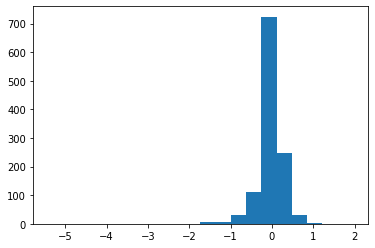

In [34]:
#from matplotlib import pyplot as plt
plt.hist(Error,bins=20)
plt.show()

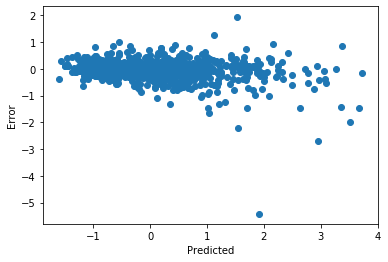

In [35]:
# plot error vs predicted
plt.scatter(train_predict,Error)
plt.xlabel("Predicted")                                 # label for X axis
plt.ylabel("Error")   
#plt.legend()
plt.show()

In [36]:
# apply the model on test
predict = CV.predict(X_test_final)
# calculate r square
print(CV.score(X_test_final,Y_test_SS))

0.7490848258804259


In [37]:
# get the predicted sale prices to original scale
print(predict[0:10])
predictfinal = SS2.inverse_transform(predict)
print(predictfinal[0:10])

[ 1.34523121 -0.57372829 -0.79666954  0.41820278 -1.06600806 -0.95489873
  0.73009516 -0.75224633  1.69140332 -0.43504026]
[286364.21452222 135790.5633742  118297.18831512 213623.72329285
  97163.19095222 105881.5291857  238096.76435685 121782.91297094
 313527.05868841 146672.89990269]
